In [1]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo

In [21]:
dry_bean = fetch_ucirepo(id=602)
X = dry_bean.data.features
y = dry_bean.data.targets

In [22]:
k_values = range(1, 21)
cv_scores = []

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    cv_scores.append(cross_val_score(model, X, y, cv=5, scoring='accuracy'))


c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [28]:
cv_scores

[array([0.30003672, 0.08559882, 0.0668626 , 0.07714916, 0.15576782]),
 array([0.30003672, 0.11204996, 0.06943424, 0.07457752, 0.15540044]),
 array([0.29856776, 0.10800882, 0.07494489, 0.07861866, 0.15576782]),
 array([0.29966948, 0.14033799, 0.07678178, 0.07825129, 0.15319618]),
 array([0.29783327, 0.13997061, 0.07972079, 0.07825129, 0.15833946]),
 array([0.298935  , 0.17707568, 0.08412932, 0.07788391, 0.15870683]),
 array([0.30077121, 0.17634093, 0.08633358, 0.07751653, 0.15870683]),
 array([0.30113845, 0.18074945, 0.08706833, 0.07457752, 0.15833946]),
 array([0.30040397, 0.1800147 , 0.08706833, 0.07714916, 0.15944159]),
 array([0.30150569, 0.21932403, 0.08780309, 0.07567965, 0.15944159]),
 array([0.30077121, 0.22005878, 0.08706833, 0.07714916, 0.15907421]),
 array([0.30113845, 0.2626745 , 0.08817046, 0.07567965, 0.15907421]),
 array([0.30113845, 0.2626745 , 0.08853784, 0.07861866, 0.15944159]),
 array([0.30113845, 0.28545187, 0.08890522, 0.07714916, 0.15980896]),
 array([0.30040397, 

In [29]:
mean_scores = {}

In [30]:
i = 0
for scores in cv_scores:
    mean_scores[i] = scores.mean()
    i+=1

In [31]:
mean_scores

{0: np.float64(0.13708302448756787),
 1: np.float64(0.14229977687551792),
 2: np.float64(0.14318158943746134),
 3: np.float64(0.14964734243334396),
 4: np.float64(0.15082308352151902),
 5: np.float64(0.15934614731828334),
 6: np.float64(0.15993381548800686),
 7: np.float64(0.160374640819233),
 8: np.float64(0.1608155471002047),
 9: np.float64(0.16875080781100288),
 10: np.float64(0.16882433716324569),
 11: np.float64(0.1773474549265071),
 12: np.float64(0.17808220878396483),
 13: np.float64(0.18249073192871137),
 14: np.float64(0.18234383512371682),
 15: np.float64(0.18814844456413013),
 16: np.float64(0.1878545969876441),
 17: np.float64(0.18814844456413013),
 18: np.float64(0.18844234610711325),
 19: np.float64(0.18844231912386472)}

In [34]:
import matplotlib.pyplot as plt

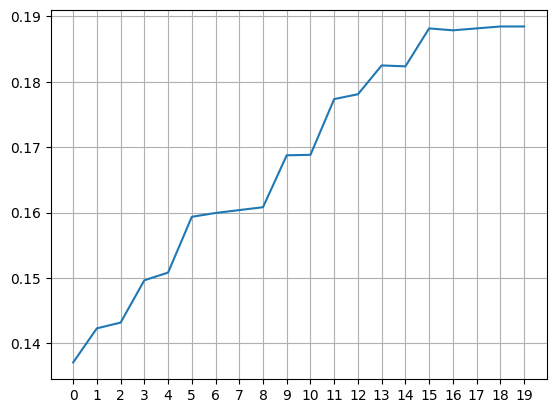

In [44]:
plt.plot([str(key) for key in mean_scores.keys()], mean_scores.values())
plt.grid(True)

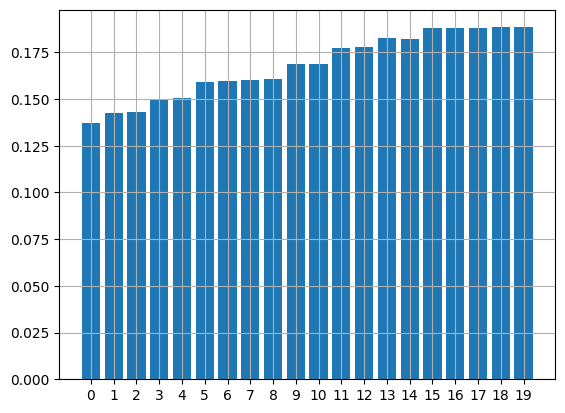

In [ ]:
plt.bar([str(key) for key in mean_scores.keys()], mean_scores.values())
plt.grid(True)

In [4]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group"